<a href="https://colab.research.google.com/github/jvanelteren/housing/blob/master/Rent_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import numpy as np

In [0]:
#make train and test datasets. Splitting labels and features happens later
path_test = "/content/drive/My Drive/Colab Notebooks/datasets/test.csv"
path_train = "/content/drive/My Drive/Colab Notebooks/datasets/train.csv"

# if developing on local
# path_train = r'datasets\train.csv'
# path_test = r'datasets\test.csv'
from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv(path_train)
test = pd.read_csv(path_test)
print(train.shape,test.shape)
print(train.columns)
train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1460, 81) (1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fir

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
import aoc
missing = aoc.nan_inspect(train)

ModuleNotFoundError: ignored

In [0]:
for col in missing.index[missing['total']>0.3]:
    if train[col].dtype =='object':
        train

PoolQC object
MiscFeature object
Alley object
Fence object
FireplaceQu object


In [0]:
import heatmap
from heatmap import heatmap, corrplot
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
corrplot(train.corr())

In [0]:
y = (set(train.columns) - set(test.columns)).pop()
cat_x = [col for col in test.columns if test[col].dtype == 'object']
num_x = [col for col in test.columns if test[col].dtype != 'object']


import numpy as np
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
    train.loc[:,test.columns],train.loc[:,y], test_size=0.33, random_state=42) 
ds = (train_x,test_x,train_y,test_y)

In [0]:
for d in ds: print(d.shape)

(978, 80)
(482, 80)
(978,)
(482,)


In [0]:
# todo multivariate imputation, possibly with pipelines for numeric and categorical data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x = imp.fit_transform(train_x)


In [0]:
# https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
# https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler/51237727

# don't know features are normal so just going with minmax scalar atm
scaler = preprocessing.MinMaxScaler()
x = scaler.fit_transform(train_x)

ValueError: ignored

In [0]:
#https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki
#The crux of it is that the sklearn encoder creates a function which persists and can then be applied to new data sets which use the same categorical variables, with consistent results.
# So don't use pandas get dummies, but a OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore",categories=cat_x)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [0]:
from sklearn.pipeline import Pipeline
linreg = Pipeline([('impute', imp), 
                   ('scale', scaler),
                   ('onehot',encoder),
                   ('linreg',reg)],verbose=True)

In [0]:
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline
https://stackoverflow.com/questions/43798377/one-hot-encode-categorical-variables-and-scale-continuous-ones-simultaneouely
https://www.google.com/search?q=columntransformer+vs+featureunion&rlz=1C1GCEU_enNL835NL846&oq=columntransformer+vs+feature&aqs=chrome.1.69i57j0.8743j0j4&sourceid=chrome&ie=UTF-8


In [0]:
linreg.fit(train_x,train_y)
prediction = linreg.predict(test_x)
linreg.score(test_x, test_y)

[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.1s


ValueError: ignored

In [0]:
#Preprocessing, fill empty values
print('inspect for missing values', features_train.isnull().sum())

imputer = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0, copy=False)
for var in numeric:
  features_train[var]=imputer.fit_transform(features_train[[var]]).ravel()  
for var in categorical:
  mostfreq = pd.Series(features_train[var].value_counts().index[0])                      
  print (mostfreq)
  features_train[var]=features_train[var].fillna(str(mostfreq))  

print('no more missing values', features_train.isnull().sum())
#Preprocessing, scale the numeric data
scaler = preprocessing.StandardScaler(with_mean=False)
for var in numeric:
  features_train[var] = scaler.fit_transform(features_train[[var]])
print (features_train.head())


inspect for missing values bathrooms    0
bedrooms     0
latitude     0
longitude    0
price        0
dtype: int64
no more missing values bathrooms    0
bedrooms     0
latitude     0
longitude    0
price        0
dtype: int64
        bathrooms  bedrooms   latitude  longitude     price
10       2.991537  2.690566  63.762974 -62.774854  0.135952
10000    1.994358  1.793710  63.888575 -62.795399  0.247659
100004   1.994358  0.896855  63.801030 -62.825198  0.129154
100007   1.994358  0.896855  63.824678 -62.796248  0.148414
100013   1.994358  3.587421  63.934618 -62.780627  0.151813


# Label Encoding

In [0]:
# Importing LabelEncoder and initializing it
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in categorical:
  # Using whole data to form an exhaustive list of levels
  data=features_train[col].append(features_test[col])
  le.fit(data.values) 
  features_train[col]=le.transform(features_train[col])
  features_test[col]=le.transform(features_test[col])
    
enc = OneHotEncoder(sparse=False, handle_unknown=0)
enc.setDropLast=True
for col in categorical:
       # creating an exhaustive list of all possible categorical values
       data=features_train[[col]].append(features_test[[col]])
       enc.fit(data)
       # Fitting One Hot Encoding on train data
       temp = enc.transform(features_train[[col]])
       # Changing the encoded features into a data frame with new column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col].value_counts().index])
       # In side by side concatenation index values should be same
       # Setting the index values similar to the X_train data frame
       temp=temp.set_index(features_train.index.values)
       # adding the new One Hot Encoded varibales to the train data frame
       features_train=pd.concat([features_train,temp],axis=1)
       del features_train[col]
       # fitting One Hot Encoding on test data
       temp = enc.transform(features_test[[col]]) 
       # changing it into data frame and adding column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # Setting the index for proper concatenation
       temp=temp.set_index(features_test.index.values)
       # adding the new One Hot Encoded varibales to test data frame
       features_test=pd.concat([features_test,temp],axis=1)
       del features_test[col]
#below the alternative way to do it with pandas
#features_train = pd.get_dummies(features_train)
#features_test = pd.get_dummies(features_test)
features_train.head()

,bathrooms,bedrooms,latitude,longitude,price
10,2.991537,2.690566,63.762974,-62.774854,0.135952
10000,1.994358,1.793710,63.888575,-62.795399,0.247659
100004,1.994358,0.896855,63.801030,-62.825198,0.129154
100007,1.994358,0.896855,63.824678,-62.796248,0.148414
100013,1.994358,3.587421,63.934618,-62.780627,0.151813


# Pipeline

LR 0.692494180886


C:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LDA 0.694641997216
KNN 0.689191180963
CART 0.67097587671
RFC 0.692412494851
NB 0.118818838161
SVM 0.694682515854


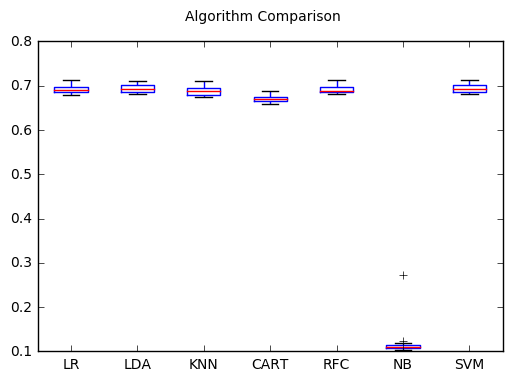

In [0]:
import sklearn.pipeline
from sklearn.preprocessing import Imputer
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


results = []
names = []
scoring = 'accuracy'
for name, model in models:
  steps = [
    #('imputing', imp),
    (name, model)]

  pipeline = sklearn.pipeline.Pipeline(steps)

  #X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(features_train, labels_train, test_size=0.33, random_state=42)

  #fit your pipeline on X_train and y_train
  #pipeline.fit( X_train, y_train )
  #call pipeline.predict() on your X_test data to make a set of test predictions
  #y_prediction = pipeline.predict( X_test )
  #test your predictions using sklearn.classification_report()
  #report = sklearn.metrics.classification_report( y_test, y_prediction )
  #print (report)

  from sklearn import cross_validation
  kfold = KFold(len(labels_train),n_folds=20, random_state=4)
  cv_results = cross_validation.cross_val_score(pipeline,features_train, labels_train, cv=kfold,scoring=scoring)
  print (name, cv_results.mean())
  results.append(cv_results)
  names.append(name)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
print('inspect for missing values', features_test.isnull().sum())

inspect for missing values bathrooms    0
bedrooms     0
latitude     0
longitude    0
price        0
dtype: int64


In [0]:
steps = [
        ('svm', SVC())]

pipeline = sklearn.pipeline.Pipeline(steps)
pipeline.fit(features_train, labels_train)
predict = pipeline.predict(features_test)
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':predict}).set_index('PassengerId').to_csv('sub.csv')

AttributeError: 'DataFrame' object has no attribute 'PassengerId'

cv = StratifiedShuffleSplit(labels, 5, random_state = 42)
true_negatives = 0
false_negatives = 0
true_positives = 0
false_positives = 0
for train_idx, test_idx in cv: 
  features_train = []
  features_test  = []
  labels_train   = []
  labels_test    = []
  for ii in train_idx:
    features_train.append( features[ii] )
    labels_train.append( labels[ii] )
    for jj in test_idx:
      features_test.append( features[jj] )
      labels_test.append( labels[jj] )
  clf2 = LogisticRegression()
  clf2.fit(features_train, labels_train)

  from sklearn import tree
  clf = tree.DecisionTreeClassifier()
  clf.fit(features_train, labels_train)

  print ('DT',clf.score(features_train,labels_train), clf.score(features_test,labels_test))
  print ('LR', clf2.score(features_train,labels_train), clf2.score(features_test,labels_test))
predict = clf.predict(features_test_1)
print (predict)
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':predict}).set_index('PassengerId').to_csv('sub.csv')

In [0]:
make a list of steps, each of which is a transformer (like SelectKBest) or, for the last one in the list, an estimator (RandomForestClassifier), and then turn that list into a Pipeline. Then the Pipeline is a single coherent workflow, with the transformed data from SelectKBest being seamlessly passed along the RandomForestClassifier. Depending on exactly what I want to do in a given case, I could have many transformers strung together, with or without an estimator at the end.

By the way””I’ve slightly changed the way that I am evaluating my model, using classification_report. It gives me more information than cross_val_score, which I was using before, although it’s a little more involved to use (I am responsible for doing the training/testing split now, whereas cross_val_score did that automatically).

Now to GridSearchCV. When I decided to select the 100 best features, setting that number to 100 was kind of a hand-wavey decision. Similarly, the RandomForestClassifier that I’m using right now has all its parameters set to their default values, which might not be optimal.

So, a straightforward thing to do now is to try different values of k (the number of features being used in the model) and any RandomForestClassifier parameters I want to tune (for the sake of concreteness, I’ll play with n_estimators and min_samples_split). Trying lots of values for each of these free parameters is tedious, and there can sometimes be interactions between the choices I make in one step and the optimal value for a downstream step. In other words, to avoid local optima, I should try all the combinations of parameters, and not just vary them independently. If I want to try 5 different values each for k, n_estimators and min_samples_split, that means 5 x 5 x 5 = 125 different combinations to try. Not something I want to do by hand.

GridSearchCV allows me to construct a grid of all the combinations of parameters, tries each combination, and then reports back the best combination/model.


import sklearn.grid_search


parameters = dict(feature_selection__k=[100, 200], 
              random_forest__n_estimators=[50, 100, 200],
              random_forest__min_samples_split=[2, 3, 4, 5, 10])



cv = sklearn.grid_search.GridSearchCV(pipeline, param_grid=parameters)


cv.fit(X_train, y_train)
y_predictions = cv.predict(X_test)
report = sklearn.metrics.classification_report( y_test, y_predictions )
GridSearchCV seems a little scary at first, because the parameter grid is easy to mess up. There’s a particular convention being followed in the way that the parameters are named in the parameters dictionary; I need to have the name of the Pipeline step (e.g. feature_selection, not select; or random_forest, not clf), followed by two underscores, followed by the name of the parameter (in sklearn parlance) that I want to vary. To put this all together in a painfully simple example:


clf = RandomForestClassifier()
steps = [("my_classifier", clf)]
parameters = dict{my_classifier__min_samples_split=[2, 3, 4, 5]}  ### "my_classifier" is the name of the random forest classifier in the steps list; min_samples_split is the associated sklearn parameter that I want to vary
pipe = Pipeline(steps)
cv = GridSearchCV( pipe, param_grid = parameters)
But once I’ve got the parameter grid set up properly, the power of GridSearchCV is that it multiplies out all the combinations of parameters and tries each one, making a 3-fold cross-validated model for each combination. Then I can ask for predictions from my GridSearchCV object and it will automatically return to me the “best” set of predictions (that is, the predictions from the best model that it tried), or I can explicitly ask for the best model/best parameters using methods associated with GridSearchCV. Of course, trying tons of models can be kind of time-consuming, but the outcome is a much better understanding of how my model performance depends on parameters.

I should also mention that I can also use GridSearchCV on just a single object, rather than a full Pipeline. For example, I can optimize SelectKBest or the RandomForestClassifier on their own and that will work just fine. But since there can sometimes be interactions between various steps in the analysis, being able to optimize over the full Pipeline is really useful. It’s also trickier to do, which makes it a good example for teaching. Last, GridSearchCV will automatically cross validate all steps of the analysis, such as the feature selection–it’s not just the final algorithm that should be cross-validated, but the upstream transforms as well!

This brings me to the end of this series, about end-to-end data analysis in scikit-learn and pandas. My goal in these posts is not to show a perfect analysis, or even one that demonstrates all the steps one might try, but instead to focus on the process. If I can get something up and running quickly, even if it’s imperfect, I’m in a much better position to understand later on how much my refinements are indeed improving the analysis. At the same time, there are definitely best practices and tools (like Pipeline and GridSearchCV) that will make my life much easier as my work expands. Having a great set of tools in the python data science stack, and knowing when and how to deploy them, leaves me free to spend my time and energy on the most interesting, important and difficult-to-automate tasks–like trying to find the uninsured.
 
Tags:#Featured, #Fun With Data
Share this post:    
 PREVIOUS POST

THE REPUBLICAN PRIMARY SO FAR, IN ONE GIF
NEXT POST 

CONNECT THE CIVIS PLATFORM TO GOOGLE SHEETS: LET YOUR DRIVE BE PART OF YOUR DATA-DRIVEN CULTURE
Search Form

Search...

CATEGORIES

Data Science
Engineering
Life at Civis
News and Insights
RECENT POSTS

Super-Fast, Hyper-Accurate Market Research Made Easy
How the Robin Hood Foundation Uses Data Science to Fight Poverty
How We Fine Tuned Lyric Opera’s Marketing Efforts
Open Sourcing the Civis API Client for Python
Supercharge Your Customer List (for Free)
ARCHIVES

January 2017
December 2016
November 2016
October 2016
September 2016
August 2016
July 2016
June 2016
May 2016
April 2016
March 2016
February 2016
January 2016
December 2015
November 2015
October 2015
September 2015
August 2015
July 2015
June 2015
April 2015
February 2015
December 2014
November 2014
October 2014
August 2014
July 2014
June 2014
May 2014
April 2014
December 2012
GET UPDATES

Receive updates about new content and blog posts.

SUBSCRIBE NOW
